In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('bank-full.csv',sep=';')

# Data Preproccessing

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()
#no null value present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.dtypes
#some column have object type so first we will convert into numerical values.

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
transform_col=['job','marital','education','default','housing','loan','contact','month','poutcome']

In [7]:
data2=pd.get_dummies(data[transform_col])

In [8]:
new_data=pd.concat([data,data2],axis=1)

In [9]:
new_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [10]:
new_data=new_data.drop(transform_col,axis=1)

In [11]:
new_data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data['y']=le.fit_transform(new_data['y'])
#converted target variable using LabelEncoding 

In [13]:
new_data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [14]:
new_data.corr()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155,-0.055717,-0.044002,...,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.004927,-0.022967,0.035526,-0.000816
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838,-0.026726,-0.048757,...,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,-0.030271
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,-0.010455,-0.022898,...,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.032952,-0.030321,0.086256
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521,-0.015722,0.009637,...,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.018925,-0.001958,0.042389,-0.003491
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172,-0.021868,0.008986,...,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.020107,-0.057486,0.107965
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621,0.027497,0.020063,...,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.701052,0.389791,0.228539,-0.869962
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236,0.014245,-0.017095,...,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,-0.532763
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000,0.005637,-0.072083,...,-0.016805,0.129456,-0.102500,-0.014937,0.128531,0.123185,0.009885,0.031955,0.306788,-0.167051
job_admin.,-0.055717,-0.026726,-0.010455,-0.015722,-0.021868,0.027497,0.014245,0.005637,1.000000,-0.188216,...,-0.004495,0.013225,0.026657,-0.007874,0.011293,0.007279,0.018431,0.010745,0.012056,-0.025940
job_blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.072083,-0.188216,1.000000,...,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.002254,0.001342,-0.053074,0.022194


In [15]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100,contamination=0.1)
clf.fit(new_data)
pred=clf.predict(new_data)

In [16]:
new_data['Outlier']=pred
new_data['Outlier'].value_counts()
#here we found 4.5k data points as outliers.

 1    40690
-1     4521
Name: Outlier, dtype: int64

In [17]:
new_data=new_data.drop(index=new_data[new_data['Outlier']==-1].index)

# Visualization

In [18]:
def check_dist(feature):
    sns.displot(new_data[feature])

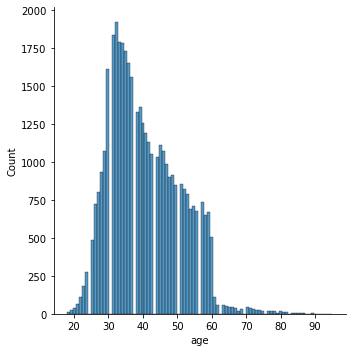

In [19]:
check_dist('age')
#positive skewed.So need Standardization

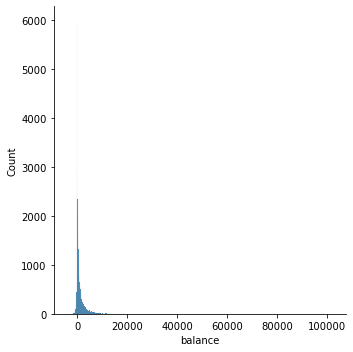

In [20]:
check_dist('balance')
#ooops.here all values are very small compare to scaling.So need Standardization

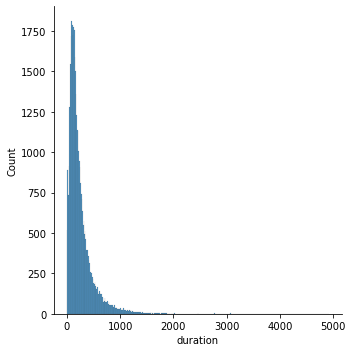

In [21]:
check_dist('duration')
#positive skewed.So need Standardization

# Standardization of columns

In [22]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
new_data['balance']=scalar.fit_transform(new_data[['balance']])
new_data['age']=scalar.fit_transform(new_data[['age']])
new_data['duration']=scalar.fit_transform(new_data[['duration']])

In [23]:
new_data.head()
#now we have almost complete data.dropping unnecessary column like outlier

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Outlier
0,1.707015,0.294739,5,0.043215,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,0.333601,-0.443954,5,-0.401880,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,-0.745509,-0.453389,5,-0.705354,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0.627904,0.072153,5,-0.640613,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
4,-0.745509,-0.453739,5,-0.211703,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [24]:
new_data=new_data.drop(['Outlier'],axis=1)

# Model Building

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X=new_data.drop(['y'],axis=1)
y=new_data['y']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=40)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(X,y)

C:\Users\patel\Anaconda3\envs\Project\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred=lr.predict(X)
new_data['y_pred']=y_pred
new_data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_pred
0,1.707015,0.294739,5,0.043215,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.333601,-0.443954,5,-0.401880,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.745509,-0.453389,5,-0.705354,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0.627904,0.072153,5,-0.640613,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,-0.745509,-0.453739,5,-0.211703,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y,y_pred))
#model is excellent

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     36956
           1       0.58      0.25      0.35      3734

    accuracy                           0.91     40690
   macro avg       0.76      0.62      0.65     40690
weighted avg       0.90      0.91      0.90     40690



In [34]:
predict=lr.predict(X_test)

In [35]:
print(classification_report(y_test,predict))
#model is excellent

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11055
           1       0.59      0.26      0.36      1152

    accuracy                           0.91     12207
   macro avg       0.76      0.62      0.66     12207
weighted avg       0.89      0.91      0.90     12207

